In [1]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [2]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
library(datasets)

In [4]:
# https://drive.google.com/file/d/1ZxbAN6WLJ4y-EpwvY67UQ6F59hhsmADx/view?usp=share_link

In [5]:
system("gdown --id 1ZxbAN6WLJ4y-EpwvY67UQ6F59hhsmADx")

In [7]:
df = read.csv("/content/ageinc_g.csv")

In [8]:
head(df)

,X,income,age,gender
,<int>,<int>,<int>,<chr>
1,0,101743,58,Female
2,1,49597,27,Female
3,2,36517,52,Male
4,3,33223,49,Male
5,4,72994,53,Female
6,5,38361,26,Female


In [9]:
tail(df)

,X,income,age,gender
,<int>,<int>,<int>,<chr>
995,994,44937,54,Female
996,995,70615,29,Female
997,996,95102,41,Female
998,997,42203,35,Male
999,998,16975,31,Female
1000,999,123857,44,Male


In [10]:
summary(df)

       X             income            age           gender         
 Min.   :  0.0   Min.   :     0   Min.   :18.00   Length:1000       
 1st Qu.:249.8   1st Qu.: 46402   1st Qu.:30.00   Class :character  
 Median :499.5   Median : 78994   Median :39.00   Mode  :character  
 Mean   :499.5   Mean   : 80117   Mean   :39.41                     
 3rd Qu.:749.2   3rd Qu.:114810   3rd Qu.:49.00                     
 Max.   :999.0   Max.   :179294   Max.   :63.00                     

In [11]:
str(df)

'data.frame':	1000 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ income: int  101743 49597 36517 33223 72994 38361 48579 115248 11527 54096 ...
 $ age   : int  58 27 52 49 53 26 29 24 31 51 ...
 $ gender: chr  "Female" "Female" "Male" "Male" ...


In [12]:
dim(df)

[1] 1000    4

In [16]:
df = df[,-1]

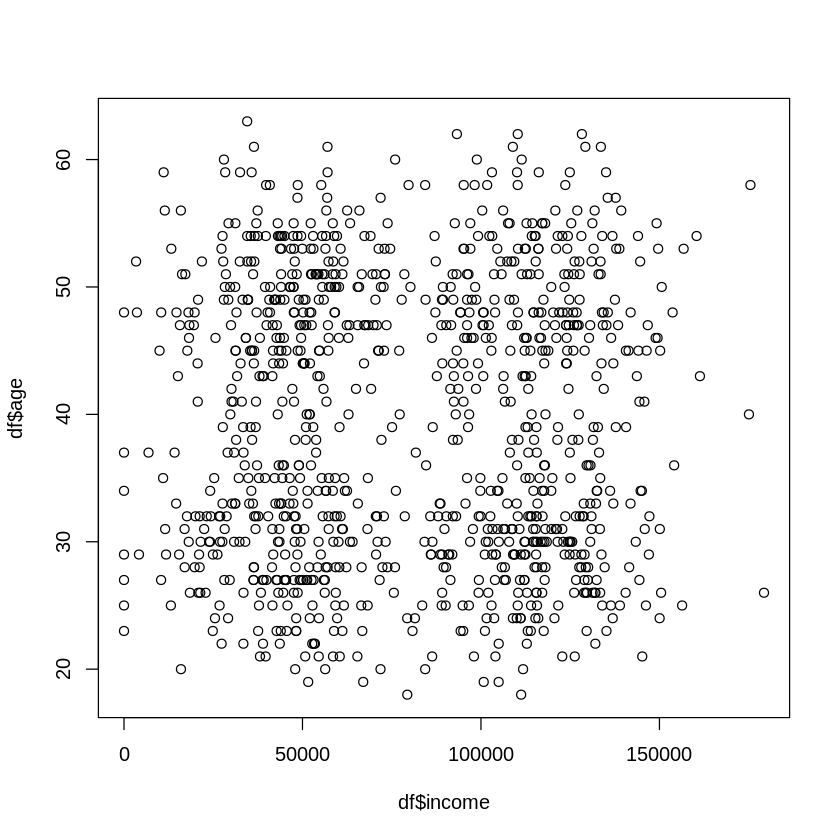

In [18]:
plot(x = df$income, y = df$age)

In [20]:
res = get_clust_tendency(df[, 1:2], n = nrow(df[, 1:2]) - 1, graph = T)
res$hopkins_stat

[1] 0.8298131

In [ ]:
# WSS cho ca bo du lieu (1 cụm, 2 thuoc tinh) 
# wss = (nrow(df) -1)* sum(apply(df[, 1:2], 2, var))
# wss

In [23]:
for (i in 1:6) wss[i] = sum(kmeans (df[,1:2],
                            centers =i,
                            nstart = 20)$withinss)

In [24]:
print(wss)

[1] 1.539990e+12 2.949515e+11 1.829886e+11 1.035845e+11 7.322054e+10
[6] 5.191563e+10


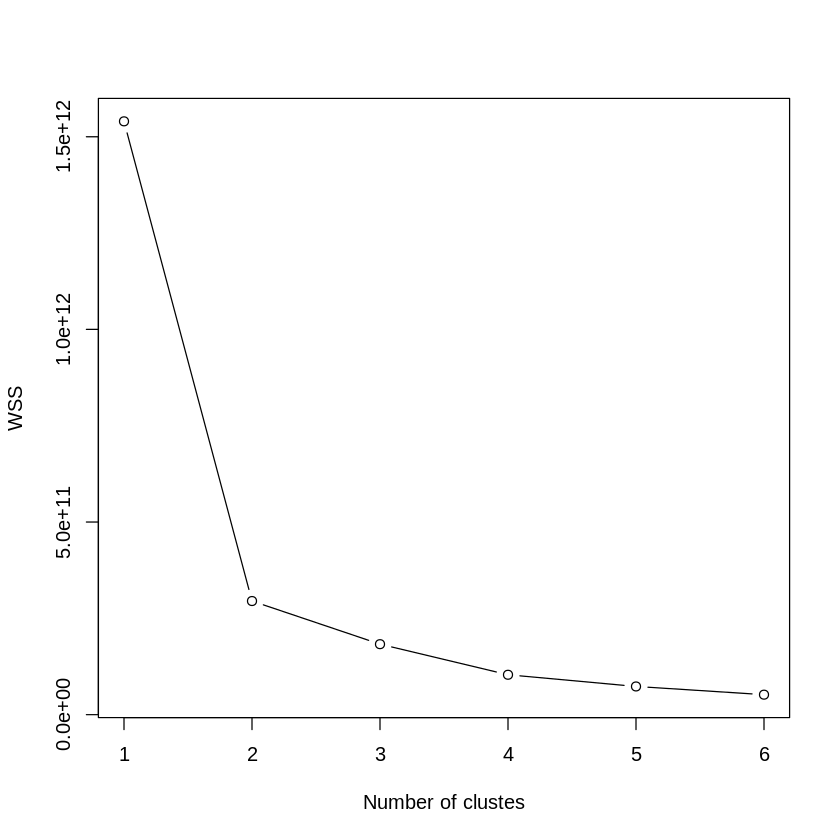

In [27]:
plot(1:6, wss, type = 'b',
    xlab="Number of clustes", ylab="WSS")

In [26]:
set.seed(13)

In [33]:
agenicCluster = kmeans(df[, 1:2], center = 3, nstart = 20)

In [34]:
print(agenicCluster)

K-means clustering with 3 clusters of sizes 337, 223, 440

Cluster means:
     income      age
1 124852.34 39.33828
2  89176.48 39.39013
3  41261.88 39.47500

Clustering vector:
   [1] 2 3 3 3 2 3 3 1 3 3 3 2 3 1 1 3 1 2 3 2 3 1 2 1 2 1 1 3 1 1 3 2 3 2 1 2 3
  [38] 3 3 1 3 3 1 1 1 1 1 1 1 3 1 3 2 3 3 3 3 3 1 3 1 3 1 1 3 1 3 1 1 1 3 2 2 1
  [75] 3 3 3 1 1 1 1 3 2 3 1 3 2 3 3 2 3 3 3 1 3 3 1 3 3 3 3 1 2 1 2 2 1 3 3 3 3
 [112] 2 2 3 1 3 2 1 3 3 1 3 1 3 3 3 1 3 3 1 1 2 3 1 2 3 1 3 1 3 3 3 3 2 3 2 2 2
 [149] 1 3 2 3 1 3 3 2 2 3 2 2 1 1 2 1 1 3 3 1 1 3 2 2 1 1 3 3 2 1 2 1 3 2 2 3 1
 [186] 1 2 2 1 1 1 3 3 3 3 2 1 1 1 3 2 3 3 3 2 2 1 3 3 3 3 3 1 1 2 3 2 3 1 3 2 2
 [223] 3 1 1 1 3 3 3 2 1 2 2 1 3 1 3 1 3 1 1 2 3 2 3 2 1 3 3 1 3 3 3 2 3 2 2 1 1
 [260] 1 1 3 2 2 3 1 1 3 2 3 2 1 3 1 2 1 3 3 1 2 1 1 3 1 1 2 3 3 3 3 3 2 1 1 3 1
 [297] 3 1 1 3 2 3 1 1 3 3 3 1 3 3 2 1 3 3 3 2 1 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3 2
 [334] 1 3 3 3 3 1 1 3 1 1 3 3 3 1 3 3 3 1 2 1 2 2 2 3 1 2 3 1 2 2 3 1 1 3 1 3 1
 [371] 3 2 3

In [35]:
print(agenicCluster$centers)

     income      age
1 124852.34 39.33828
2  89176.48 39.39013
3  41261.88 39.47500


In [36]:
compare = table(agenicCluster$cluster, df$gender)
print(compare)

   
    Female Male
  1    151  186
  2    111  112
  3    227  213


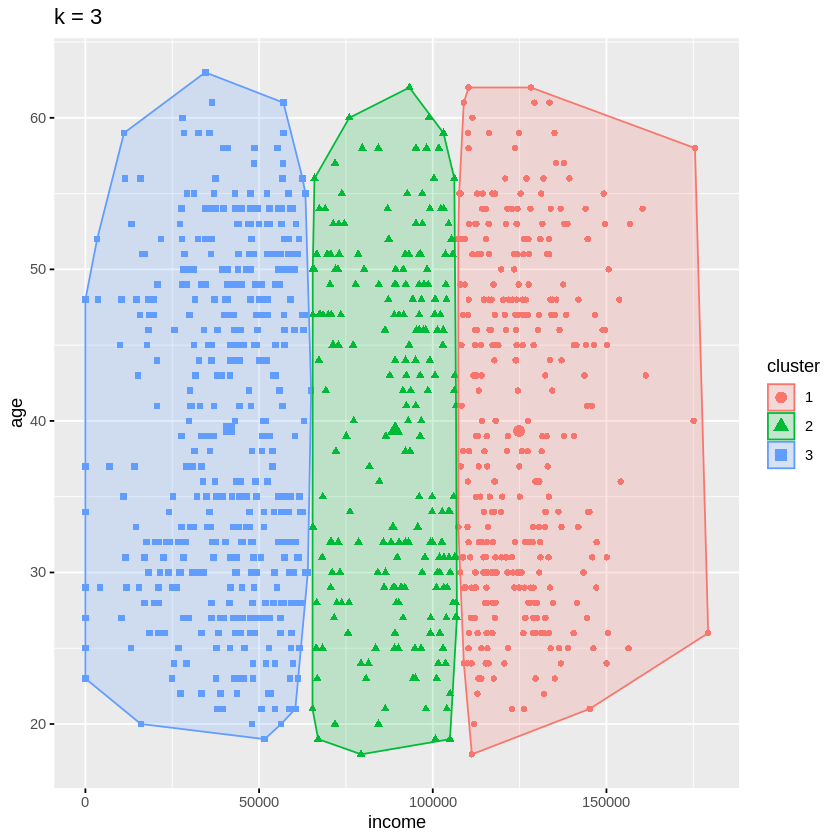

In [38]:
fviz_cluster(agenicCluster, geom = "point",
              data = df[, 1:2], stand = F) +
                ggtitle("k = 3")

NX: Cac cum o gan sat nhau va kho phan biet chi tiet.